<a href="https://colab.research.google.com/github/rodrigoyujisato/alura-data-science-maio-2022/blob/main/alura_data_science_maio_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aula 1**

In [126]:
import pandas as pd
file = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
data = pd.read_csv(file)
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [127]:
data.sample(12)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4566,NaN,Vila Anglo Brasileira,São Paulo,230,3,1,2,R$ 1.690.000
9987,Rua Rita Ferreira da Silva,Socorro,São Paulo,130,3,3,2,R$ 850.001
3058,"Rua Taguató, 0",Vila Fernandes,São Paulo,180,5,4,3,R$ 450.000
4975,NaN,Pinheiros,São Paulo,200,3,5,3,R$ 2.500.000
5324,Rua Maria Leonete da Silva Nóbrega,Vila Ida,São Paulo,239,3,4,4,R$ 2.498.000
7832,NaN,Vila Arriete,São Paulo,236,4,3,5,R$ 1.200.000
439,NaN,Jardim Franca,São Paulo,150,3,5,8,R$ 2.000.000
7158,Rua Vigário João Álvares,Vila Monumento,São Paulo,92,3,2,2,R$ 580.000
7797,Rua das Guassatungas,Vila Parque Jabaquara,São Paulo,68,2,1,1,R$ 390.000
9664,NaN,Butantã,São Paulo,250,4,2,8,R$ 1.350.000


In [128]:
data["Bairro"][6522]

'Vila Paulo Silas'

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [130]:
data["Metragem"].mean()

442.30065947242207

In [131]:
sum(data["Bairro"] == "Vila Mariana" * 1)

184

In [132]:
true_vila_mariana = ( data["Bairro"] == "Vila Mariana" )

In [133]:
imoveis_vila_mariana = data[true_vila_mariana]

In [134]:
imoveis_vila_mariana["Metragem"].mean()

233.6195652173913

In [135]:
data["Bairro"].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

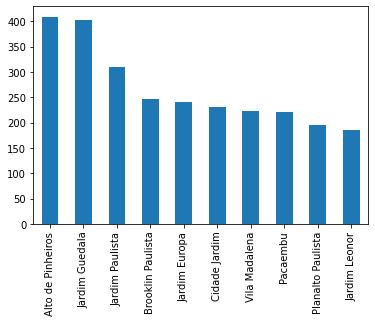

In [136]:
n_imoveis_bairro = data["Bairro"].value_counts()
n_imoveis_bairro.head(10).plot.bar()

Desafios

1.   Média da metragem dos imóveis por bairro
2.   Duas formas de selecionar os dados por bairro
3.   Explorar algns gráficos na documentação, aplicar nas demais colunas do dataframe e incluir conclusões
4.   Pegar outras estatístias dos dados: média, mediana, minimo, máximo e incluir conclusões
5.   Quais os bairros com maior incidência de NaN



In [137]:
data["Bairro"].value_counts().mean()


14.25962910128388

In [138]:
media_groupby = data.groupby('Bairro').median() # groupby method
media_groupby.head(10) # first 10 cases

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,227.5,3.0,3.0,3.0
Alto da Boa Vista,378.0,4.0,5.5,4.0
Alto da Lapa,255.0,3.0,4.0,4.0
Alto da Mooca,182.5,3.0,2.0,4.0
Alto de Pinheiros,412.0,4.0,5.0,4.0
Aricanduva,278.0,3.0,3.0,2.0
Balneário Mar Paulista,250.0,4.0,4.0,10.0
Barra Funda,122.5,3.0,2.0,1.0
Barro Branco (Zona Norte),600.0,3.0,4.0,4.0


**Aula 2** - Tratamento e dados e primeiros gráficos

In [139]:
data.info() # get data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [140]:
data["Valor"][0] # get 1st value "valor" 

'R$ 7.000.000'

In [141]:
data["Valor"][0].split() # split value

['R$', '7.000.000']

In [142]:
data["Valor"].str.split() # inform string as parameter

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [143]:
data["Valor"].str.split(expand = True) # plot as dataframe

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [144]:
data["Valor"].str.split(expand = True)[0].unique() # get unique value for column 0

array(['R$'], dtype=object)

In [145]:
data["Valor"].str.split(expand = True)[2].unique() # get unique value for column 2

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [146]:
data[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = data["Valor"].str.split(expand = True) # pivot split onto columns
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [147]:
data["Tipo_anuncio"].isnull() # check isnull in dataframe

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo_anuncio, Length: 10008, dtype: bool

In [148]:
data[data["Tipo_anuncio"].isnull()] # create new dataframe with isnull == true

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [149]:
data[data["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique() # check filter isnull 

array([None], dtype=object)

In [150]:
data_filtrado = data[data["Tipo_anuncio"].isnull()] # update dataframe 'data'
data_filtrado.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [151]:
data_filtrado.info() # check dtype in dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [152]:
data_filtrado["Valor_anuncio"].str.replace(".","").astype(float) # replace "." to "," & convert "Valor_anunciado" to float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [157]:
data_filtrado["Valor_anuncio_float"] = data_filtrado["Valor_anuncio"].str.replace(".","").astype(float) # include new column "Valor_anuncio_float" 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
data_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


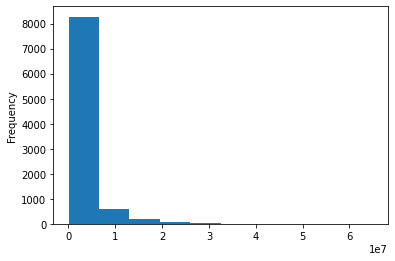

In [159]:
data_filtrado["Valor_anuncio_float"].plot.hist() # float histogram for "Valor_anuncio_float"

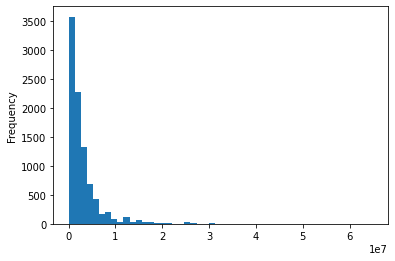

In [160]:
data_filtrado["Valor_anuncio_float"].plot.hist(bins = 50) # float histogram for "Valor_anuncio"float with 50 separation (bins)

In [161]:
data_filtrado.describe() # descriptive statistics for df

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07
